In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import files
 
 
# uploaded = files.upload()

In [ ]:
data = pd.read_csv("/content/drive/ MyDrive/BIProject/vgsales.csv")
data.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [ ]:
data = data.dropna()
data.dtypes
data['User_Score'] = data['User_Score'].apply(pd.to_numeric)
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [ ]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [ ]:
data['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

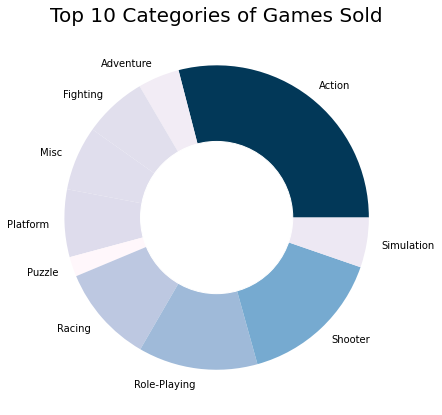

In [ ]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

In [ ]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

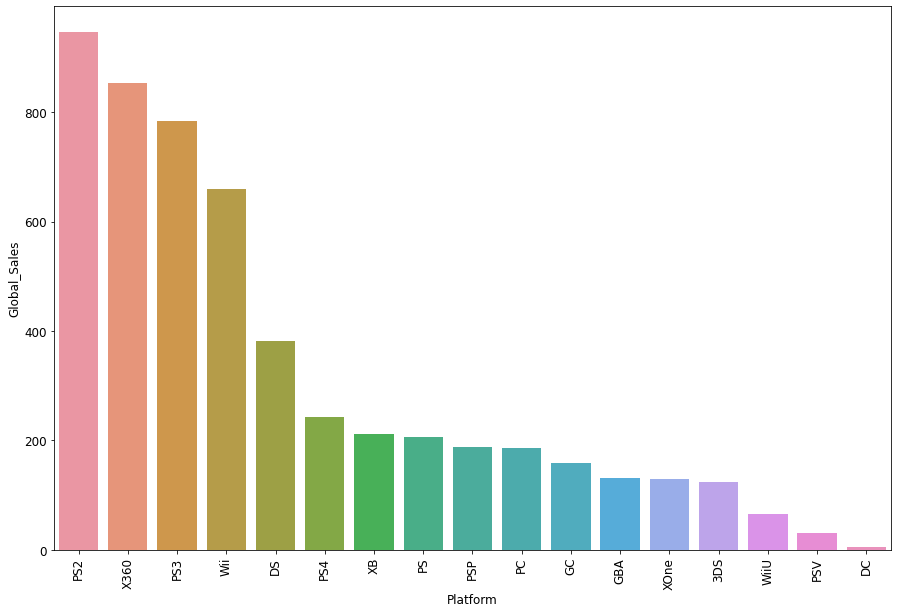

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

In [ ]:
from plotly import express as px
top_sales = data.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

In [ ]:

comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

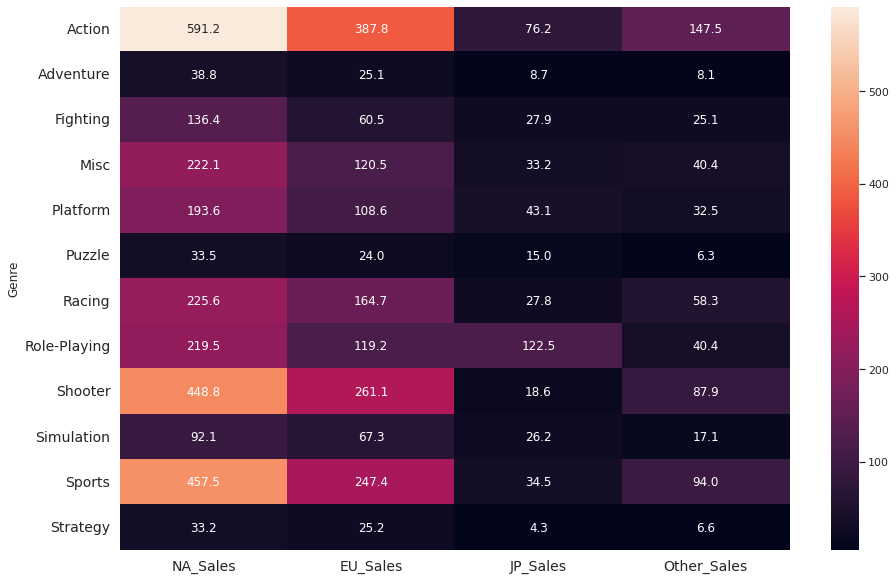

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#heatmap of sales by genre

In [ ]:
rating = data[['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_rat = rating.groupby(by=['Rating']).sum()

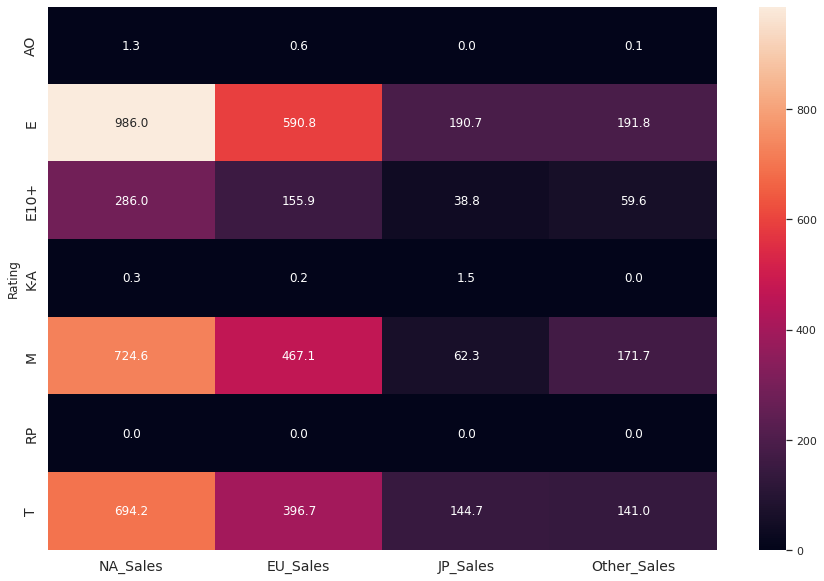

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_rat, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

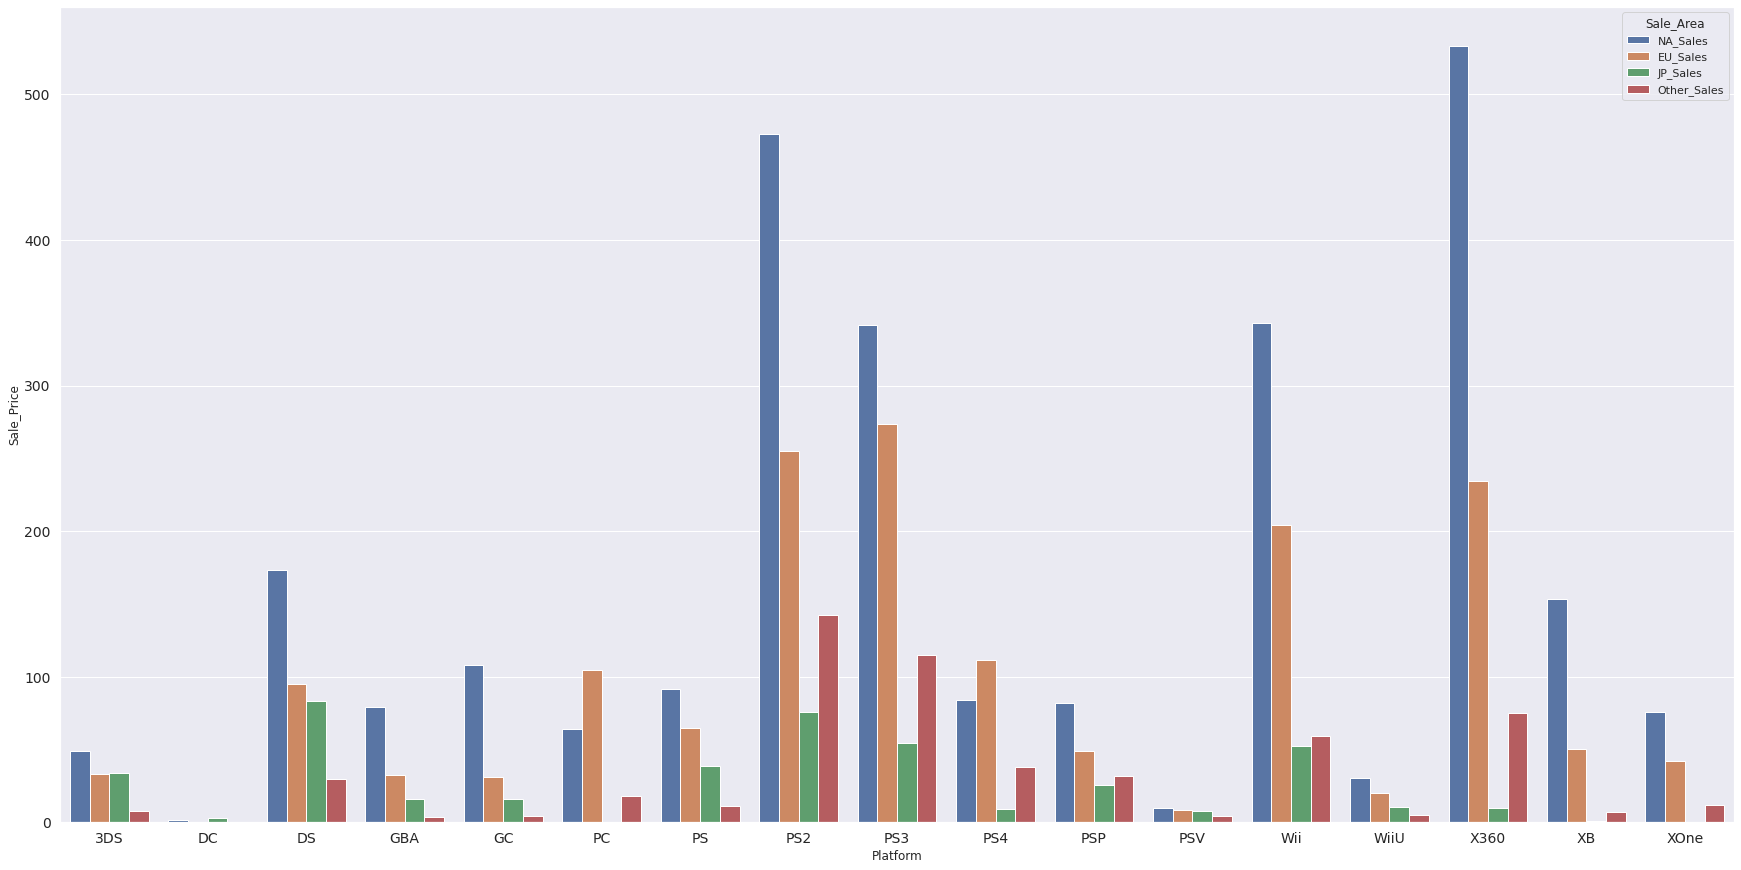

In [ ]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#output display and stuff here
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

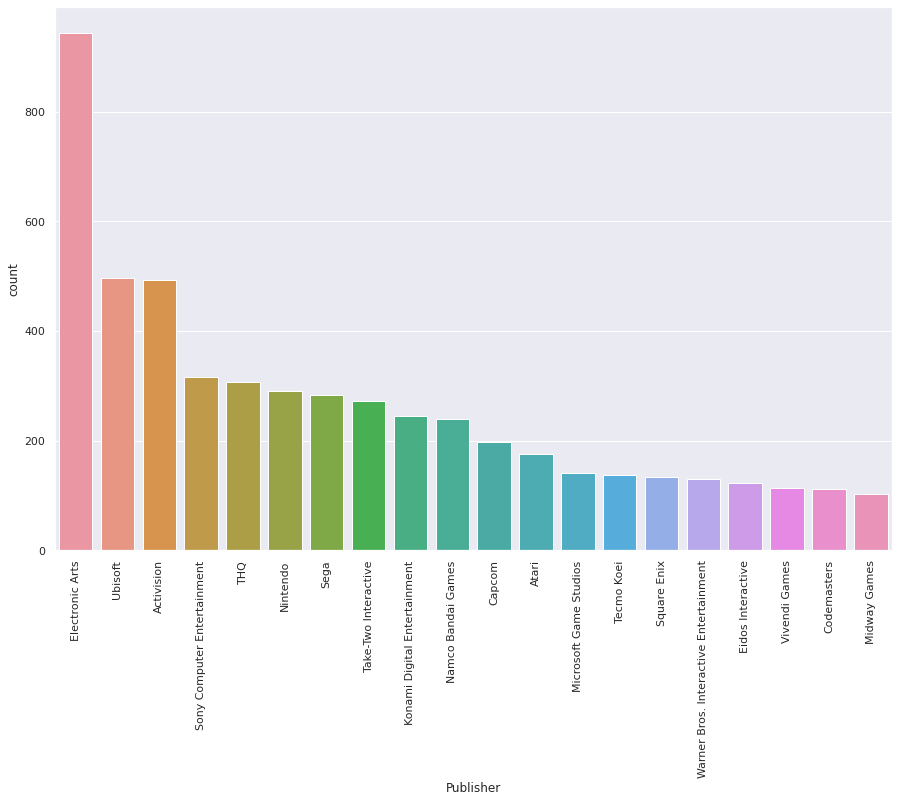

In [ ]:
top_publisher = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x7ff1a5756a90>,
 [Text(-1.0996999982041826, -0.025688790351448956, 'NA_Sales'),
  Text(0.9260781918299325, -0.5936153490409448, 'EU_Sales'),
  Text(0.8801245340527122, 0.6598339219519532, 'JP_Sales'),
  Text(0.3607178722432043, 1.0391740069133444, 'Other_Sales')],
 [Text(-0.5998363626568268, -0.014012067464426702, '50.7%'),
  Text(0.5051335591799632, -0.3237901903859699, '30.4%'),
  Text(0.4800679276651157, 0.35990941197379267, '8.3%'),
  Text(0.19675520304174776, 0.5668221855890969, '10.6%')])

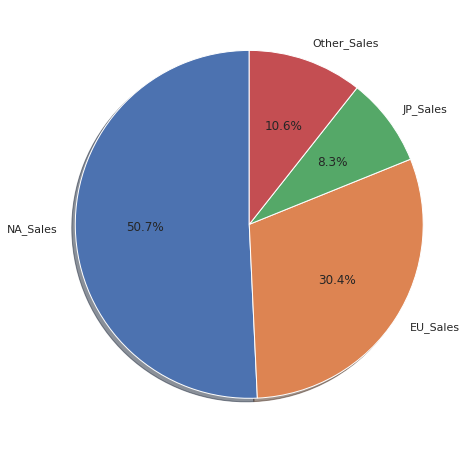

In [ ]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

In [ ]:
#data = data.drop(data[data['Global_Sales']>60].index)

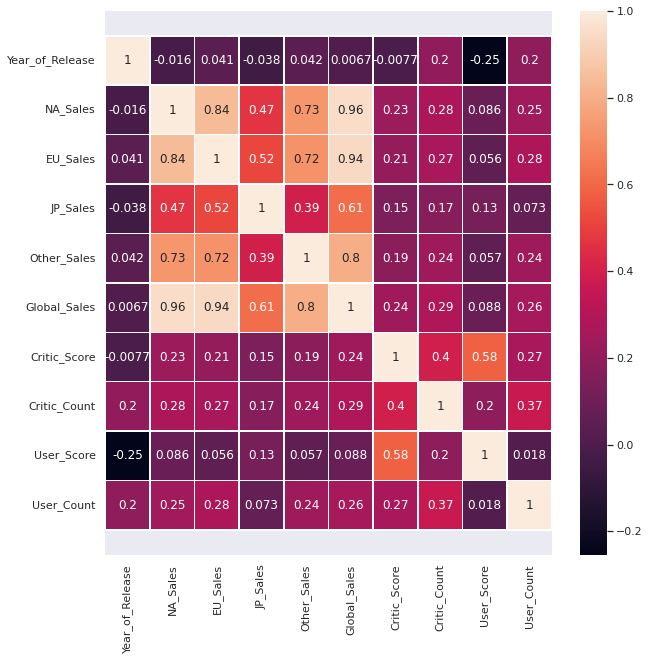

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plotting heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

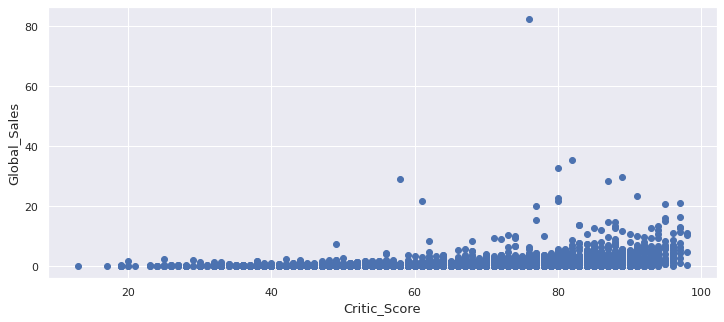

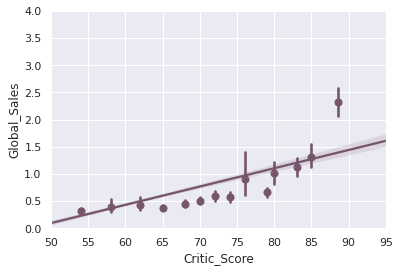

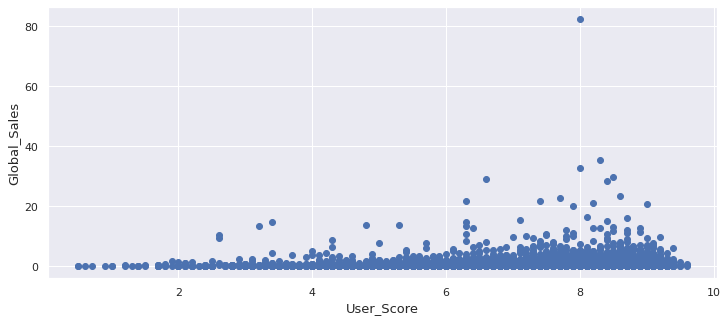

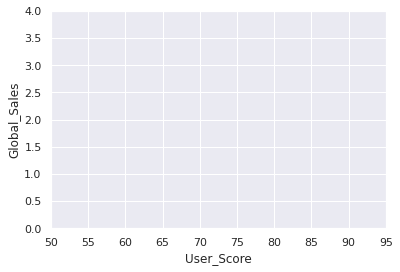

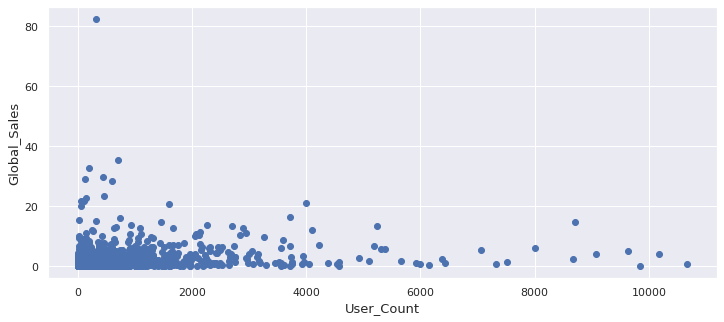

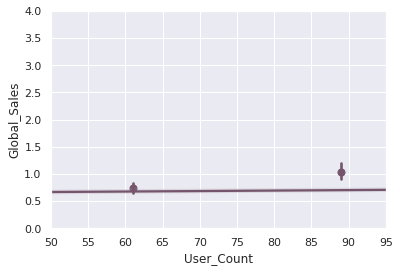

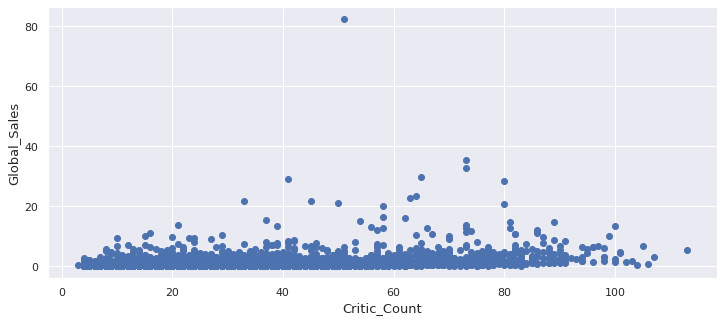

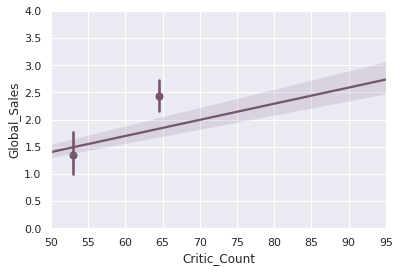

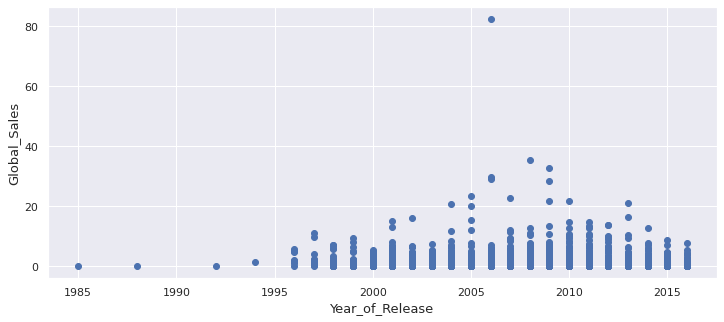

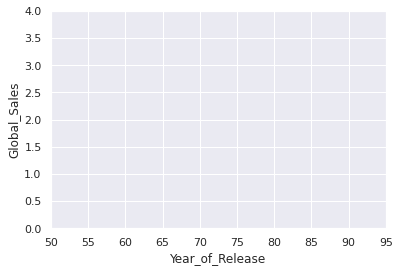

In [ ]:
feat=['Critic_Score', 'User_Score','User_Count','Critic_Count','Year_of_Release']
for i in feat:  
  fig, ax = plt.subplots(1,1, figsize=(12,5))
  ax.scatter(x = data[i], y = data['Global_Sales'])
  plt.ylabel('Global_Sales', fontsize=13)
  plt.xlabel(i, fontsize=13)
  plt.show()
  sns.regplot(x=i, y="Global_Sales", data=data,truncate=True, x_bins=15, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

In [ ]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 1.5 * iqr)) |
                    (df_out[key] >= (third_quartile + 1.5 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 1.5 * iqr)) &
                    (df_out[key] < (third_quartile + 1.5 * iqr))]
    return df_out, removed

In [ ]:
data2, outliers = rm_outliers(data, ["Global_Sales"])

In [ ]:
data2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1050,Deal or No Deal,DS,2007.0,Misc,Mindscape,1.15,0.40,0.00,0.15,1.70,20.0,13.0,1.9,41.0,Artefacts Studio,E
1052,Portal 2,PS3,2011.0,Shooter,Valve,0.83,0.60,0.02,0.24,1.70,95.0,54.0,8.4,937.0,Valve Software,E10+
1054,NCAA Football 07,PS2,2006.0,Sports,Electronic Arts,1.41,0.05,0.00,0.23,1.70,87.0,18.0,8.6,23.0,EA Sports,E
1055,The Sims 3: Late Night Expansion Pack,PC,2010.0,Simulation,Electronic Arts,0.59,0.87,0.00,0.23,1.70,74.0,17.0,5.3,77.0,The Sims Studio,T
1056,No Man's Sky,PS4,2016.0,Action,Hello Games,0.63,0.76,0.03,0.27,1.70,71.0,94.0,4.5,5096.0,Hello Games,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [ ]:
counts = data['Publisher'].value_counts()

data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

counts = data2['Publisher'].value_counts()

data2['Publisher'] = data2['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

counts = outliers['Publisher'].value_counts()

outliers['Publisher'] = outliers['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
features=["Critic_Score","User_Count","Critic_Count"]
d1=data.copy()
d2=data2.copy()
d3=outliers.copy()
feature = ["Platform","Genre","Rating","Publisher"]
y1 = data["Global_Sales"]
y2 = data2["Global_Sales"]
y3 = outliers["Global_Sales"]
features

['Critic_Score', 'User_Count', 'Critic_Count']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import numpy as np

le = LabelEncoder()
for col in feature:
    d1[col]=le.fit_transform(d1[col])
    d2[col]=le.fit_transform(d2[col])
    d3[col]=le.fit_transform(d3[col])


In [ ]:
features.extend(feature)

In [ ]:
X = d1[features]
y = data['Global_Sales']
X2 = d2[features]
y2 = data2['Global_Sales']
X3 = d3[features]
y3 = outliers['Global_Sales']

In [ ]:
X

,Critic_Score,User_Count,Critic_Count,Platform,Genre,Rating,Publisher
0,76.0,322.0,51.0,12,10,1,15
2,82.0,709.0,73.0,12,6,1,15
3,80.0,192.0,73.0,12,10,1,15
6,89.0,431.0,65.0,2,4,1,15
7,58.0,129.0,41.0,12,3,1,15
...,...,...,...,...,...,...,...
16667,46.0,21.0,4.0,3,0,1,19
16677,81.0,9.0,12.0,3,2,4,13
16696,80.0,412.0,20.0,5,0,4,10
16700,61.0,43.0,12.0,5,8,6,19


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=0)
x3_train,x3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2,random_state=0)

In [ ]:
## Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear1 = LinearRegression()
regressor_MultiLinear2 = LinearRegression()
regressor_MultiLinear3 = LinearRegression()
regressor_MultiLinear1.fit(x_train,y_train)
regressor_MultiLinear2.fit(x2_train,y2_train)
regressor_MultiLinear3.fit(x3_train,y3_train)

LinearRegression()

In [ ]:
y_pred1 = regressor_MultiLinear1.predict(x_test)
#print("for all dataset ",y_pred1)
y_pred2 = regressor_MultiLinear2.predict(x2_test)
#print("for dataset with removed outliers ",y_pred2)
y_pred3 = regressor_MultiLinear3.predict(x3_test)
#print("for outlier dataset ",y_pred3)

In [ ]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred1)
print(r2_MultiLinear)
r2_MultiLinear = r2_score(y2_test,y_pred2)
print(r2_MultiLinear)
r2_MultiLinear = r2_score(y3_test,y_pred3)
print(r2_MultiLinear)

0.10492455277481427
0.20209660390201634
0.06377777866553735


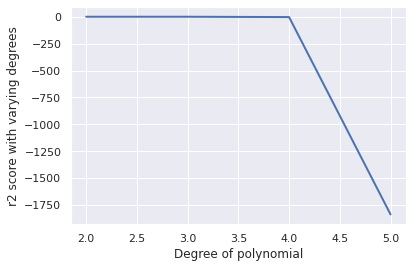

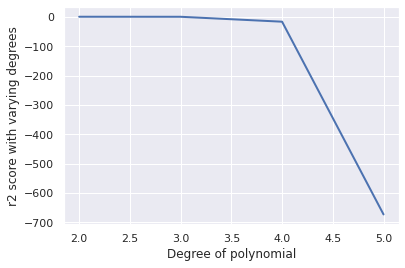

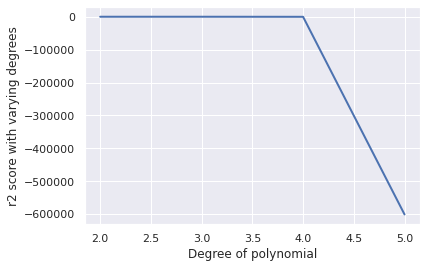

In [ ]:
## Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
def polyplot(xtrain,ytrain,xtest,ytest):
  scores_list = []
  pRange = range(2,6)
  for i in pRange :
      poly_reg = PolynomialFeatures(degree=i)
      x_poly = poly_reg.fit_transform(xtrain)
      poly_regressor = LinearRegression()
      poly_regressor.fit(x_poly,ytrain)
      y_pred = poly_regressor.predict(poly_reg.fit_transform(xtest))
      scores_list.append(r2_score(ytest,y_pred))
  plt.plot(pRange,scores_list,linewidth=2)
  plt.xlabel('Degree of polynomial')
  plt.ylabel('r2 score with varying degrees')
  plt.show()
polyplot(x_train,y_train ,x_test,y_test)
polyplot(x2_train,y2_train ,x2_test,y2_test)
polyplot(x3_train,y3_train ,x3_test,y3_test)

In [ ]:
## Training the polynomial regression on the training model
def poly(xtrain, ytrain , xtest ,ytest):
  poly_reg = PolynomialFeatures(degree=2)
  x_poly = poly_reg.fit_transform(xtrain)
  poly_regressor = LinearRegression()
  poly_regressor.fit(x_poly,ytrain)
  y_pred = poly_regressor.predict(poly_reg.fit_transform(xtest))
  r2_poly = r2_score(ytest,y_pred)
  return r2_poly
print(poly(x_train,y_train ,x_test,y_test))
print(poly(x2_train,y2_train ,x2_test,y2_test))
print(poly(x3_train,y3_train ,x3_test,y3_test))

0.21695986796292321
0.24684587182313034
0.15610619368864342


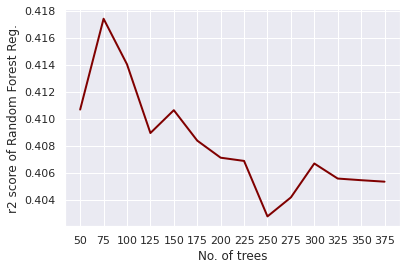

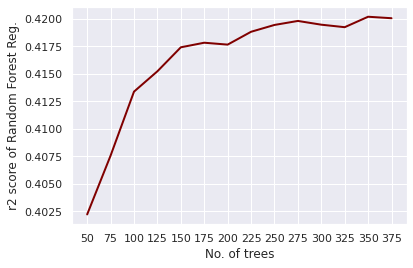

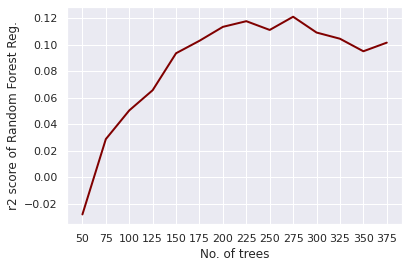

In [ ]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,300,25)
def forests(xtrain,ytrain,xtest,ytest):
  scores_list=[]
  for i in forestRange: 
      regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
      regressor_Forest.fit(xtrain,ytrain)
      y_pred = regressor_Forest.predict(xtest)
      scores_list.append(r2_score(ytest,y_pred))
  plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
  plt.xticks(forestRange)
  plt.xlabel('No. of trees')
  plt.ylabel('r2 score of Random Forest Reg.')
  plt.show()  
forests(x_train,y_train ,x_test,y_test)
forests(x2_train,y2_train ,x2_test,y2_test)
forests(x3_train,y3_train ,x3_test,y3_test)  

In [ ]:
# Training the Random Forest regression on the training model
def forest(xtrain, ytrain , xtest ,ytest,est):
  regressor_Forest = RandomForestRegressor(n_estimators=est,random_state=0)
  regressor_Forest.fit(xtrain,ytrain)
  y_pred = regressor_Forest.predict(xtest)
  r2_forest = r2_score(ytest,y_pred)
  return r2_forest
print(forest(x_train,y_train ,x_test,y_test,75))
print(forest(x2_train,y2_train ,x2_test,y2_test,350))
print(forest(x3_train,y3_train ,x3_test,y3_test,275))

0.4173995514782516
0.42019352237037844
0.1209474383767134


In [ ]:
  ## Applying XGBoost Regression model on the training set
from xgboost import XGBRegressor
def xgb(xtrain, ytrain , xtest ,ytest):
    regressor_xgb = XGBRegressor(objective ='reg:squarederror')
    regressor_xgb.fit(xtrain,ytrain)
    ## Predicting test results
    y_pred = regressor_xgb.predict(xtest)
    ## Calculating r2 score
    r2_xgb = r2_score(ytest,y_pred)
    return (r2_xgb)
print(xgb(x_train,y_train ,x_test,y_test))
print(xgb(x2_train,y2_train ,x2_test,y2_test))
print(xgb(x3_train,y3_train ,x3_test,y3_test))

0.3766346103180298
0.42063805335977456
0.19319476303447647


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn import metrics 
import tensorflow as tf

inputs = tf.keras.Input(shape=(7,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse'
)


batch_size = 64
epochs = 150

history = model.fit(
    x2_train,
    y2_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

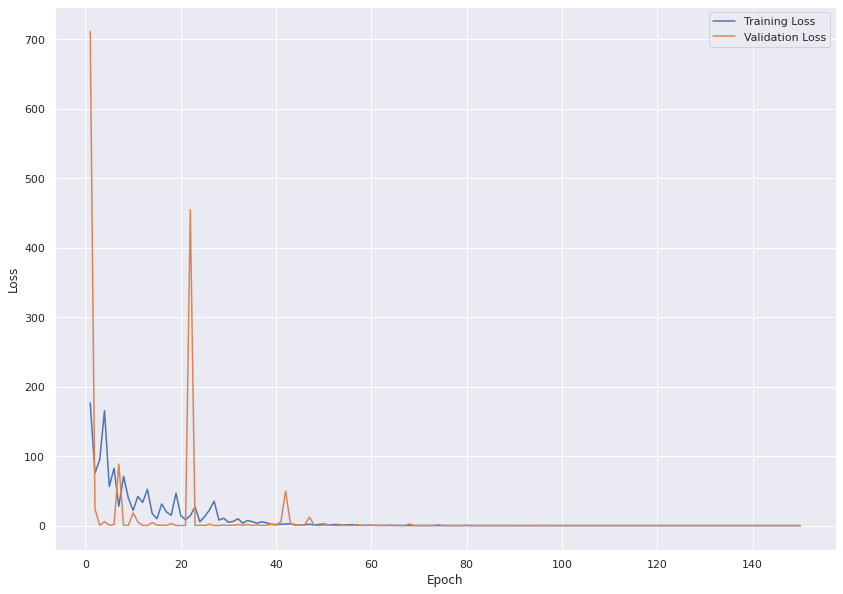

In [ ]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
np.argmin(val_loss)

93

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 8.0 MB/s 


In [ ]:
from tensorflow_addons.metrics import RSquare
y_pred = np.squeeze(model.predict(x_test))

result = RSquare()
result.update_state(y_test, y_pred)

print("R^2 Score:", result.result())

R^2 Score: tf.Tensor(0.038393497, shape=(), dtype=float32)


In [ ]:
model.evaluate(x_test, y_test)

43/43 [==============================] - 0s 2ms/step - loss: 4.0662


4.066182613372803